# Tracking a Nonstationary Problem

In [4]:
from IPython.display import display, Math
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [5]:
display(Math("k-bandits \\ simulator"))
display(Math("Initialize,\\ for \\ a \\ = \\  1 \\ to \\ k:"))
display(Math("Q(a) \\gets 0"))
display(Math("N(a) \\gets 0"))
display(Math("Loop \\ forever:"))
display(Math("A \\gets \lbrace ^{argmax_{a} \\ Q(a) \\ P \\ = \\ 1 \\ - \\ \\epsilon} _{\\ rand(a) \\ p \\ = \\ \\epsilon} "))
display(Math("R \\gets bandit(A)"))
display(Math("N(A) \\gets N(A) + 1"))
display(Math("Q(A) \\gets Q(A) + \\frac{1}{N(A)}[R - Q(A)]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# k-bandit simulation
k = 10

# epsilon-greedy
epsilon = [0.01, 0.1, 0]

# number of simulation runs  
runs = 2000

# number of time steps
times = 1000

# step size parameter
step_size = 0.01 

# number of times a taken prior to t
reward_distribution = []

In [7]:
def bandit(A, q):
    """
    Returns expected q*(a)
    """
    
    return random.gauss(q[A], 1)

In [8]:
def argmax(Q):
    """
    Return argmax A
    """
    
    # Maximum value
    max_val = float('-inf')
    
    # Keep track of ties
    ties = []
    
    # Find max value
    for i in range(len(Q)):
        
        # New max value
        if Q[i] > max_val:
            
            # Update max
            max_val = Q[i]
            
            # Reset ties
            ties.clear()
            
        # Tie 
        if Q[i] == max_val:
            
            # Keep track of index
            ties.append(i)
    
    # Ties broken randomly
    return random.choice(ties)

In [9]:
def e_greedy(Q, epsilon):
    """
    Returns an action from e-greedy
    """
    
     # Greedy action
    action = argmax(Q)

    # With probability epsilon
    if random.random() <= epsilon:
        
        # Exploratory action
        action = random.randint(0, len(Q)-1)
    
    return action

In [10]:
def simple_bandit(epsilon, steps=1000, k=10):
    """
    Returns single run sample-average from stationary 10-arm testbed
    """
    
    # Q(a) <-- 0
    Q = [0] * k
    
    # N(a) <-- 0
    N = [0] * k
    
    # rewards list
    rewards = [0]
    
    # averages
    averages = []
    
    # q*(a) = E[Rt|At =a]
    q = [random.gauss(0, 1) for i in range(k)]
    
    # Incremental Implementation at 1000 steps per run
    for i in range(steps):
            
        # Action from e-greedy
        A = e_greedy(Q, epsilon)

        # reward for a at time step t
        R = bandit(A, q)

        # keep count of each action
        N[A] = N[A] + 1

        # update rule
        Q[A] = Q[A] + (1/N[A])*(R - Q[A])

        # add to rewards
        rewards.append(rewards[-1] + R)

        # add to averages
        averages.append(rewards[-1]/(i+1))
    
    return averages

In [11]:
def simulate_runs(runs, epsilon):
    """
    Returns averages over 2,000 runs of 10-arm testbed
    """
    
    # distribution
    distribution = []
    
    # Simulate 2,000 runs
    for i in range(runs):
        
        # Add averages to reward average distribution
        distribution.append(simple_bandit(epsilon=epsilon))
        
    # Return distribution of rewards over 2,000 runs
    return distribution

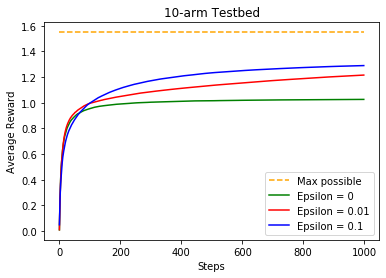

In [12]:
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title("10-arm Testbed")
plt.plot([1.55 for _ in range(times)], linestyle="--", label='Max possible', color='orange')
plt.plot(np.mean(simulate_runs(runs, 0), axis=0), label="Epsilon = 0", color='green')
plt.plot(np.mean(simulate_runs(runs, 0.01), axis=0), label="Epsilon = 0.01", color='red')
plt.plot(np.mean(simulate_runs(runs, 0.1), axis=0), label="Epsilon = 0.1", color='blue')
plt.legend()
plt.show()

In [13]:
display(Math("Non-stationary \\ Bandits"))
display(Math("Initialize,\\ for \\ a \\ = \\  1 \\ to \\ k:"))
display(Math("Q(a) \\gets 0"))
display(Math("N(a) \\gets 0"))
display(Math("Loop \\ forever:"))
display(Math("A \\gets \lbrace ^{argmax_{a} \\ Q(a) \\ P \\ = \\ 1 \\ - \\ \\epsilon} _{\\ rand(a) \\ p \\ = \\ \\epsilon} "))
display(Math("R \\gets bandit(A)"))
display(Math("N(A) \\gets N(A) + 1"))
display(Math("Q(A) \\gets Q(A) + \\alpha[R - Q(A)]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
def non_stationary(start, epsilon, steps=1000, k=10, alpha=0.1):
    """
    Returns single run sample-average from non-stationary 10-arm testbed
    """
    
    # Q(a) <-- 0
    Q = [start] * k
    
    # N(a) <-- 0
    N = [0] * k
    
    # rewards list
    rewards = [0]
    
    # averages
    averages = []
    
    # q*(a) = E[Rt|At =a]
    q = [random.gauss(0, 1) for i in range(k)]
    
    # Incremental Implementation at 1000 steps per run
    for i in range(steps):
            
        # Action from e-greedy
        A = e_greedy(Q, epsilon)

        # reward for a at time step t
        R = bandit(A, q)

        # keep count of each action
        N[A] = N[A] + 1

        # update rule
        Q[A] = Q[A] + alpha*(R - Q[A])
        
        # Step bandits
        q[A] += random.gauss(0, 0.01)
        
        # add to rewards
        rewards.append(rewards[-1] + R)

        # add to averages
        averages.append(rewards[-1]/(i+1))
    
    return averages

In [15]:
def simulate_non_stationary(start, epsilon, runs=2000):
    """
    Return non-stationary reward distribution
    """
    
    # distribution
    distribution = []
    
    # Simulate 2,000 runs
    for i in range(runs):
        
        # Add averages to reward average distribution
        distribution.append(non_stationary(start, epsilon))
        
    # Return distribution of rewards over 2,000 runs
    return distribution

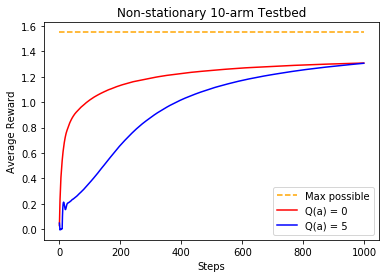

In [16]:
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title("Non-stationary 10-arm Testbed")
plt.plot([1.55 for _ in range(times)], linestyle="--", label='Max possible', color='orange')
plt.plot(np.mean(simulate_runs(runs, 0.1), axis=0), label="Q(a) = 0", color='red')
plt.plot(np.mean(simulate_non_stationary(start=5, epsilon=0), axis=0), label="Q(a) = 5", color='blue')
plt.legend()
plt.show()

In [17]:
display(Math("Upper Confidence Bound Action-Selection"))
display(Math("Initialize,\\ for \\ a \\ = \\  1 \\ to \\ k:"))
display(Math("Q(a) \\gets 0"))
display(Math("N(a) \\gets 0"))
display(Math("Loop \\ forever:"))
display(Math("A \\gets argmax \\ a \\lbrack Qt(a) + \\ c \\sqrt{\\frac{ln \\ t}{Nt(A)}} \\rbrack "))
display(Math("R \\gets bandit(A)"))
display(Math("N(A) \\gets N(A) + 1"))
display(Math("Q(A) \\gets Q(A) + \\frac{1}{N(A)}[R - Q(A)]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
def ucb(c, steps=1000, k=10):
    """
    Return sample-average from Upper-Confidence-Bound 
    """
    
    # ucb limit
    bound = [0] * k

    # Q(a) <-- 0
    Q = [0] * k
    
    # N(a) <-- 0
    N = [0] * k
    
    # rewards list
    rewards = [0]
    
    # averages
    averages = []
    
    # q*(a) = E[Rt|At =a]
    q = [random.gauss(0, 1) for i in range(k)]
    
    # Incremental Implementation at 1000 times per run
    for i in range(steps):
        
        # test each action once
        if i < k:
            
            # Sequential action test
            A = i
        
        # once every action tested once
        else:
        
            # Argmax a[Qt(a) + c sqrt(ln t/ Nt(a))]
            A = argmax(bound)

        # reward for a at time step t
        R = bandit(A, q)

        # keep count of each action
        N[A] = N[A] + 1

        # update rule
        Q[A] = Q[A] + (1/N[A])*(R - Q[A])
        
        # UCB
        bound[A] = Q[A] + c*math.sqrt(math.log(i+1)/N[A]) 

        # add to rewards
        rewards.append(rewards[-1] + R)

        # add to averages
        averages.append(rewards[-1]/(i+1))
    
    return averages

In [19]:
def simulate_ucb(c, runs=2000):
    """
    Return UCB reward distribution
    """
    
    # distribution
    distribution = []
    
    # Simulate 2,000 runs
    for i in range(runs):
        
        # Add averages to reward average distribution
        distribution.append(ucb(c=c))
        
    # Return distribution of rewards over 2,000 runs
    return distribution

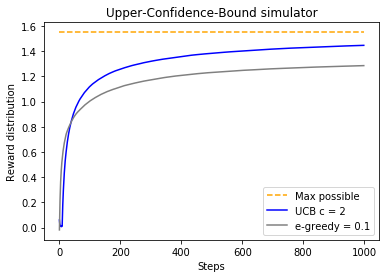

In [20]:
plt.title("Upper-Confidence-Bound simulator")
plt.xlabel('Steps')
plt.ylabel('Reward distribution')
plt.plot([1.55 for _ in range(times)], linestyle="--", label='Max possible', color='orange')
plt.plot(np.mean(simulate_ucb(c=2), axis=0), label="UCB c = 2", color='blue')
plt.plot(np.mean(simulate_runs(runs, 0.1), axis=0), label="e-greedy = 0.1", color='grey')
plt.legend()
plt.show()

In [21]:
display(Math("Gradient Bandit Algorithm"))
display(Math("Initialize,\\ for \\ a \\ = \\  1 \\ to \\ k:"))
display(Math("Q(a) \\gets 0"))
display(Math("N(a) \\gets 0"))
display(Math("H(a) \\gets 0"))
display(Math("Loop \\ forever:"))
display(Math("Pr\\{ A_{t} \\ = \\ a \\} = \\frac{\\partial \\ e^{H_{t}(a)}}{\\partial  \\sum^{k} _{b=1} e^{H_{t}(b)}} = \\pi_{t}(a) "))
display(Math("R \\gets bandit(A)"))
display(Math("N(A) \\gets N(A) + 1"))
display(Math("Q(A) \\gets Q(A) + \\frac{1}{N(A)}[R - Q(A)]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
def pr(H, a):
    """
    Action probability from soft-max distribution
    """
    
    # Assign no preference
    p = 0
    
    # Try to prevent overflow
    try:
        
        # Probability 
        p = math.e**H[a]/sum([math.e**h for h in H])
        
    except OverflowError as err:
        
        return p 
    
    return p

In [23]:
def gradient(alpha, baseline, steps=1000, k=10):
    """
    Gradient Bandit Algorithm
    """
    
    # Q(A) <-- 0
    Q = [0] * k 
    
    # N(A) <-- 0
    N = [0] * k
    
    # H(A) <-- 0
    H = [0] * k
    
    # pi(a)
    policy = [1/k] * k
    
    # rewards list
    rewards = [0]
    
    # averages
    averages = []
    
    # q*(a) = E[Rt|At =a]
    q = [random.gauss(0, 1) for i in range(k)]

    # Incremental Implementation at 1000 times per run
    for i in range(steps):
        
        # all actions have an equal probability of being selected
        if i < k:

            # Test first k actions
            A = i
        
        # Action-Probability Pr{At = a}
        else:
            
            # e^Ht(a)/sum(e^Ht(b))
            policy[A] = pr(H, A)
            
            # Highest action probability
            if math.isclose(max(Q), max(policy)):
                
                # argmax Q
                A = argmax(Q)
                
            else:
                
                # argmax pi
                A = np.argmax(policy)
        
        # reward for a at time step t
        R = bandit(A, q) + 4

        # keep count of each action
        N[A] = N[A] + 1
        
        # keep count of each action
        H[A] = H[A] + 1
        
        # update rule
        Q[A] = Q[A] + (1/N[A])*(R - Q[A])

        # add to rewards
        rewards.append(rewards[-1] + R)

        # add to averages
        averages.append(rewards[-1]/(i+1))
        
        # Action-Preference update
        if H[A] > 0:
            
            # No baseline
            average = 0
            
            # Baseline 
            if baseline == True:
                
                # Reward average up to time t
                average = averages[-1]
            
            # Action taken update
            H[A] = H[A] + alpha*(R - average)*(1-policy[A])
            
            # Run through actions
            for a in range(k):
                
                # Make sure actions not taken at time t
                if a != A:
                    
                    # Actions not taken update
                    H[a] = H[a] - alpha*(R - average)*policy[a]

    return averages

In [24]:
def simulate_gradient(alpha, baseline, runs=2000):
    """
    Return UCB reward distribution
    """
    
    # distribution
    distribution = []
    
    # Simulate 2,000 runs
    for i in range(runs):
        
        # Add averages to reward average distribution
        distribution.append(gradient(alpha, baseline))
        
    # Return distribution of rewards over 2,000 runs
    return distribution

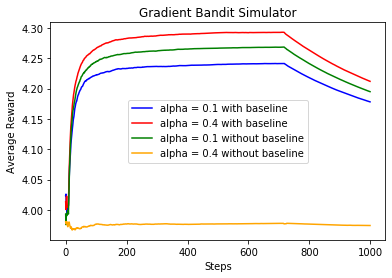

In [25]:
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title("Gradient Bandit Simulator")
plt.plot(np.mean(simulate_gradient(alpha=0.1, baseline=True), axis=0), label="alpha = 0.1 with baseline", color='blue')
plt.plot(np.mean(simulate_gradient(alpha=0.4, baseline=True), axis=0), label="alpha = 0.4 with baseline", color='red')
plt.plot(np.mean(simulate_gradient(alpha=0.1, baseline=False), axis=0), label="alpha = 0.1 without baseline", color='green')
plt.plot(np.mean(simulate_gradient(alpha=0.4, baseline=False), axis=0), label="alpha = 0.4 without baseline", color='orange')
plt.legend()
plt.show()